In [71]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
import random as rd
from sklearn.decomposition import PCA
from IPython.display import display
import os 
from pathlib import Path
import shutil 
import cv2

## Vamos  a sacar el atributo de estructura (b_structure) de este notebook. 

### Para eso utilizamos los landmarks alineados e imagenes warpeadas que alinee en la parte de forma.

### Por un lado obtenemos los 21 features que corresponden a la forma (17) y los que además usan la textura(4), para los 21 features, estos los sacamos unicamente para los frames0.

### Por otro lado, para todas las imagenes sacamos su diferencia de emocion. 

### Luego de tener ambas, juntamos los features para cada imagen, y hacemos PCA con estos

### Vamos a sacar los  17 primeros landmarks--lo  hacemos de la frame 0  de cada secuencia



In [72]:
my_data = pd.read_csv('transformed_landmarks_procustres_AgainTV1_totalxy.csv',header = None)
my_data #orden xy

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,265.050800,265.134280,266.581590,273.107110,285.159460,305.647910,326.266310,351.728120,383.572310,416.076590,...,403.721050,384.339700,365.114420,352.872000,351.195620,351.417280,365.428210,383.166430,393.743530,381.331230
1,268.372648,268.523696,270.196174,277.030778,289.745604,307.484740,327.475426,352.465115,383.631481,415.479025,...,410.033599,388.542133,365.812881,350.148823,346.495185,348.427939,366.548944,388.553865,401.089656,386.828793
2,257.326168,258.221938,260.805877,266.690325,276.474686,294.626252,320.389932,350.903551,384.016598,416.652835,...,381.291440,369.144658,363.629485,362.510836,363.795650,361.240308,361.083938,362.222985,365.226899,363.423345
3,253.460187,254.067610,256.607161,264.014142,274.281111,293.550897,321.081863,351.984111,386.873564,420.570991,...,365.650615,360.823577,357.793074,356.997512,360.010454,356.564389,356.516172,357.125080,360.324901,357.831171
4,254.903363,256.296142,258.279922,265.854494,273.228336,293.755002,321.060229,352.685877,387.297974,420.440242,...,380.992998,369.192722,362.104119,364.336818,365.953482,362.861085,361.016295,363.270506,366.821005,364.637481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,246.472393,248.380416,254.059928,260.002762,268.385993,286.878623,313.995946,347.537238,383.367737,419.716659,...,374.724052,372.139460,355.797698,355.228702,353.839377,353.498967,353.093587,353.751973,353.963433,355.355260
476,241.817575,243.919839,249.920766,256.169473,265.235114,285.103781,312.265039,346.062300,383.044500,420.954278,...,361.843715,357.958485,352.069562,351.505764,350.050926,349.858959,349.418582,350.081371,350.176998,351.665389
477,246.884274,245.567993,250.834303,256.640029,264.260362,283.502885,312.177996,347.341648,383.992157,420.255053,...,371.250844,368.623758,354.486332,353.861859,352.152094,352.137879,351.761961,352.348319,352.192229,354.161028
478,249.916927,248.522125,254.106740,260.984156,267.035487,284.188326,312.658089,347.272305,383.658269,420.271966,...,383.790889,378.627447,359.392009,346.452478,346.574275,347.169828,356.476551,366.957381,370.283189,371.253189


In [4]:
#cant_frames_per_seq = pd.read_csv('ckAgainT_landmark_FramePerSeq.csv',header = None)
#cant_frames_per_seq =np.asarray(cant_frames_per_seq).flatten()

In [5]:
#cant_frames_per_seq[0]

In [6]:
### Aca tenemos que guardarnos cada frame0

In [73]:
subjects_images = '../ck+warpedAgainT_V1'

In [74]:
def get_first_frames_and_images(path):
    first_images = []
    first_frames = []
    total = 0
    
    current_neutral_index = 0
    images_names = np.sort(os.listdir(path))    
    for i in range(0, len(images_names)):        
        if int(images_names[i].split('_')[5].split('.')[0]) == 1:
            first_frames.append(my_data.iloc[i])
            first_images.append(path +'/'+ images_names[i])   

    first_frames = np.asarray( first_frames, dtype=object)   
    first_images = np.asarray( first_images, dtype=object) 
    
    return first_frames, first_images

def get_first_frames(path):
    return get_first_frames_and_images(path)[0]
    
def get_first_images(path):
    return get_first_frames_and_images(path)[1]

In [75]:
get_first_frames_and_images(subjects_images)

(array([[265.0508, 265.13428, 266.58159, ..., 383.16643,
         393.7435300000001, 381.33123],
        [257.32616848051816, 258.22193750138103, 260.8058765464788, ...,
         362.2229850886586, 365.2268994900328, 363.42334470265575],
        [254.9033625218135, 256.29614205064473, 258.27992174701853, ...,
         363.2705063724093, 366.82100527830505, 364.6374812225226],
        ...,
        [245.2484376013241, 246.3543731055994, 250.87361154476295, ...,
         344.4828571257924, 345.5139773504732, 349.2140056520161],
        [246.47239275476196, 248.38041612276533, 254.05992761942147, ...,
         353.7519729365857, 353.96343310430456, 355.3552598119273],
        [246.88427416221884, 245.56799272019947, 250.8343025292185, ...,
         352.3483187841835, 352.19222868700376, 354.1610281670649]],
       dtype=object),
 array(['../ck+warpedAgainT_V1/warped_image_procustres_S010_002_00000001.png',
        '../ck+warpedAgainT_V1/warped_image_procustres_S010_004_00000001.png',
     

In [20]:
#def get_first_frames_and_images(path):
#    first_images = []
#    first_frames = []
#    total = 0
#    first_frames.append(my_data.iloc[total])#first frame of first secuence
#    first_images.append(path + '/' + 'warped_image_procustres_' + str(total)+ '.png')
    
#    for i in range(0, len(cant_frames_per_seq)-1):
#        total = total+cant_frames_per_seq[i]
#        first_frames.append(my_data.iloc[total])
#        first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')

#    first_frames = np.asarray( first_frames, dtype=object)   
#    first_images = np.asarray( first_images, dtype=object) 
    
#    return first_frames, first_images

#def get_first_frames(path):
#    return get_first_frames_and_images(path)[0]
    
#def get_first_images(path):
#    return get_first_frames_and_images(path)[1]

In [76]:
first_frames = get_first_frames(subjects_images)
first_images= get_first_images(subjects_images)
first_images

array(['../ck+warpedAgainT_V1/warped_image_procustres_S010_002_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S010_004_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S010_006_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_001_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_002_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_003_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_004_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_005_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S011_006_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S014_001_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S014_002_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S014_003_00000001.png',
       '../ck+warpedAgainT_V1/warped_image_procustres_S014_005_0

In [77]:
#this fuction changes order [x1..xn,y1..yn] to [x1, y1...xn, yn]
def change_to_intercalate_order(frame_list):
    intercalated_first_frames = []
    for fframe in frame_list:
        xaxis = fframe[0: int(len(frame_list[0])/2)]
        yaxis = fframe[int(len(frame_list[0])/2):len(frame_list[0])]
        lan =[]
        for (a, b) in zip(xaxis, yaxis):
            lan.append(np.asarray([a,b]))        
        intercalated_first_frames.append( np.asarray(lan))
    intercalated_first_frames = np.asarray(intercalated_first_frames)
    return intercalated_first_frames
    
    

In [78]:
#Vamos a usar el orden intercalado para los feature points,
#lo hacemos solo con las primeras frames porque la estructura
#de la cara no cambia
intercalated_first_frames = change_to_intercalate_order(first_frames)


In [79]:
first_frame = intercalated_first_frames

In [80]:
first_frame[0].shape

(68, 2)

In [81]:
first_frame[0]

array([[265.0508 , 235.20293],
       [265.13428, 267.96751],
       [266.58159, 300.26222],
       [273.10711, 332.17964],
       [285.15946, 362.43119],
       [305.64791, 388.11916],
       [326.26631, 413.01333],
       [351.72812, 432.93272],
       [383.57231, 436.38575],
       [416.07659, 431.76955],
       [444.07285, 415.27008],
       [463.04949, 388.75845],
       [474.88119, 358.8677 ],
       [484.37324, 327.50411],
       [488.33405, 294.94015],
       [493.69735, 262.6749 ],
       [495.53709, 230.48113],
       [272.72158, 205.77172],
       [285.94009, 189.23394],
       [307.03562, 185.34416],
       [328.65736, 188.59208],
       [346.17715, 201.0486 ],
       [401.94885, 192.42688],
       [420.28459, 178.33151],
       [441.93144, 171.43151],
       [464.26289, 175.04457],
       [480.84314, 190.17066],
       [375.20929, 212.69576],
       [376.06307, 239.6232 ],
       [376.37229, 266.26507],
       [378.018  , 292.81867],
       [354.71128, 313.43082],
       [

In [82]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def feature_point_one(im):
    point1 = im[18][0]
    point2 = im[25][0]
    return np.abs(point2-point1)

def feature_point_two(im):
    point1 = im[1][0]
    point2 = im[15][0]
    return np.abs(point2-point1)
   
def feature_point_three(im):
    point1 = im[1][0]
    point2 = im[14][0]
    return np.abs(point2-point1)

def feature_point_four(im):   
    point1a = im[3][0]
    point2a = im[13][0]        
    point1b = im[4][0]
    point2b = im[12][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_five(im):   
    point1 = im[6][0]
    point2 = im[10][0]    
    return np.abs(point2-point1)

def feature_point_six(im):
    point1 = im[31][0]
    point2 = im[35][0]
    return np.abs(point2-point1)

def feature_point_seven(im):
    point1 = im[61][0]
    point2 = im[65][0]
    return np.abs(point2-point1)

def feature_point_eight(im):
    point1a = im[37][0]
    point2a = im[43][0]        
    point1b = im[38][0]
    point2b = im[44][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_nine(im):
    point1 = im[42][0]
    point2 = im[45][0]
    return np.abs(point2-point1)

def feature_point_ten(im):
    point1 = im[39][0]
    point2 = im[42][0]
    return np.abs(point2-point1)

def feature_point_eleven(im):
    point1 = im[36][0]
    point2 = im[39][0]
    return np.abs(point2-point1)

def feature_point_twelve(im):
    point1 = im[27][1]
    point2 = im[33][1]
    return np.abs(point2-point1)

def feature_point_thirteen(im):
    point1 = im[33][1]
    point2 = im[8][1]
    return np.abs(point2-point1)

def feature_point_fourteen(im):
    point1a = im[38][1]
    point2a = im[20][1]        
    point1b = im[43][1]
    point2b = im[23][1]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    return np.abs(point2-point1)

def feature_point_fifteen(im):
    point1 = im[37][1]
    point2 = im[41][1]        
    point3 = im[38][1]
    point4 = im[40][1]     
    point5 = im[43][1]
    point6 = im[47][1]        
    point7 = im[44][1]
    point8 = im[46][1]
    point_pair1 = np.abs(point2-point1)
    point_pair2 = np.abs(point4-point3)
    point_pair3 = np.abs(point6-point5)
    point_pair4 = np.abs(point8-point7)
    return np.mean(np.array([point_pair1, point_pair2, point_pair3, point_pair4]))
    
def feature_point_sixteen(im):
    point1 = im[33][1]
    point2 = im[56][1]
    return  np.abs(point2-point1)

def feature_point_seventeen(im):
    point1 = im[67][1]
    point2 = im[8][1]
    return  np.abs(point2-point1)

def feature_point_eighteen(im):
    points = im[39:59]
    hull = ConvexHull(points)   
    return  hull.volume

def feature_point_ninetotwentyone(im, imagen):
        #Rectangulo actual en anterorior era siempre imagen 0. FIjarsefirst_frame[0][1][0]
    left_cheek_x0 = int(im[1][0])#x de landmark 2
    left_cheek_x1 = int(im[31][0])#
    left_cheek_y0 = int(im[28][1])
    left_cheek_y1 = int(im[2][1])

    right_cheek_x0 = int(im[35][0])#x de landmark 2
    right_cheek_x1 = int(im[15][0])#
    right_cheek_y0 = int(im[28][1])
    right_cheek_y1 = int(im[14][1])
    
    img = cv2.imread(imagen)
    
    imgall = img[left_cheek_y0: right_cheek_y1,left_cheek_x0:right_cheek_x1 ]
    imgall =cv2.cvtColor(imgall, cv2.COLOR_BGR2GRAY)   
    nineteen, twenty, twentyone = cheeks_function_with_nose(imgall, left_cheek_y0,left_cheek_x0)
    return  nineteen, twenty, twentyone

def feature_point_nineteen(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[0]

def feature_point_twenty(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[1]

def feature_point_twentyone(im, imagen):
    return feature_point_ninetotwentyone(im, imagen)[2]



In [83]:
feature_points_options = {1 : feature_point_one,
           2 : feature_point_two,
           3 : feature_point_three,
           4 : feature_point_four,
           5 : feature_point_five,
           6 : feature_point_six,
           7 : feature_point_seven,
           8 : feature_point_eight,
           9 : feature_point_nine,
           10 : feature_point_ten,
           11 : feature_point_eleven,
           12 : feature_point_twelve,
           13 : feature_point_thirteen,
           14 : feature_point_fourteen,
           15 : feature_point_fifteen,
           16 : feature_point_sixteen,
           17 : feature_point_seventeen,
           18 : feature_point_eighteen,
           19 : feature_point_nineteen,
           20 : feature_point_twenty,
           21 : feature_point_twentyone,
}

In [84]:
def get_feature_point(im, number, imagen):
    if number == 19 or number == 20 or number == 21 :
        res = feature_points_options[number](im, imagen)
    else:
        res = feature_points_options[number](im)
    return res

In [85]:
def list_get_feature_number(lista, number, imagenlist):
    res = []
    for i in range(0, len(lista)):
        fea_p = get_feature_point(lista[i], number, imagenlist[i])
        res.append(fea_p)
    return np.asarray(res,dtype= object)
    

In [86]:
def list_get_feature_point(lista, number, imagenlist):
    res = list_get_feature_number(lista, number, imagenlist)
    return res

first = list_get_feature_point(first_frame, 1, first_images)
first.shape

(221,)

In [38]:
first_frame[0].shape

(68, 2)

In [87]:

    
def cheeks_function_with_nose(imgall, left_cheek_y0,left_cheek_x0):
    #usamos sobel para sacar las derivadas
    edgesx = cv2.Sobel(imgall, -1, dx=1, dy=0, ksize=1)
    edgesy = cv2.Sobel(imgall, -1, dx=0, dy=1, ksize=1)
#   edgesy = cv2.Sobel(imgleft, -1, dx=0, dy=1, ksize=1)    
    output = np.zeros((len(edgesx),len(edgesx[0])))
    
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            output[i][j] = math.sqrt(pow(edgesx[i][j],2) + pow(edgesy[i][j],2)+ pow(-1,2)) #raiz de suma de cuadrados y -1 al cuadradp

    angle = np.zeros((len(edgesx),len(edgesx[0]),3))
    
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            pos =np.array([edgesx[i][j], edgesy[i][j], -1]/output[i][j])
            angle[i][j] = pos
            
    beta = np.array([0,0,1])    

    #dados los angles, sacamos los coefficientes
        
    coff = np.zeros((len(edgesx),len(edgesx[0])))
    for i in range(0, len(edgesx)):
        for j in range(0, len(edgesx[0])):
            coff[i][j] = 1- np.dot(angle[i][j],beta)

    
    coff = coff.flatten()
    coff_sum = coff.sum() #lo usamos para center of mass
    coff_average = coff.mean()#es el 19
    
    partial_sumx = []    
    for i in range(0, len(edgesx)):#losy0debencambiarse arriba
        partial_sumx.append(coff[i]*(left_cheek_y0+i))
    
    partial_sumy = []
    for i in range(0, len(edgesx[0])):#losy0debencambiarse arriba
        partial_sumy.append(coff[len(edgesx)+i]*(left_cheek_x0+i))  
    

  
    center_of_massx = np.asarray(partial_sumx).sum()/coff_sum
    center_of_massy = np.asarray(partial_sumy).sum()/coff_sum

      
    return coff_average, center_of_massx, center_of_massy  

In [88]:
#por ahora usamos la distancia horizontal (ver 1)

In [89]:
#los primeros 17 son simples, usamos los landmarks 68 de la ck+ database, y los adaptamos al del modelo del paper (que es un modelo aam de 94 puntos) 

In [90]:
#usamos 19 y 6 porque son los mas cercanos a nivel de temple de los landmarks de ck+ y asumimos hay correlacion entre la distancia de estos y la distancia que tendria gente con temples mas largos
#Acordemonos que los array el indice va de 0-67 y en imagenes de 1 a 68, en codigo usamos -1 del que se usa en la imagen

#first_feature_point
#19,26

In [91]:

#second_feature_point
#2,16

In [34]:

#third_feature_point
#3,15

In [35]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio

#fourth_feature_point
#diferencia de mean entre 4 y 5, 14 y 13,  

In [36]:

#five_feature_point
#7,11

In [37]:

#six_feature_point
#32,36

In [38]:

#seven_feature_point
#61,65

In [39]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio

#eight_feature_point
#dieferencia entre mean de 38-39 y 44-45

In [40]:

#nine_feature_point
#43 46

In [41]:

#ten_feature_point
#40-43

In [42]:

#eleven_feature_point
#37 40

In [43]:
#estos son vertical distance

In [44]:

#twelve_feature_point
#28-34

In [45]:

#thirteen_feature_point
#34 9

In [46]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio

#fourteen_feature_point
#distancia de ños means de39-44 y 21-24


In [47]:
#it says distance, I asumme is vertical pnly, but could be actual difference in witch case we use np.align
#creo que solo la vertical tiene + sentido para el height

#fifteen_feature_point
#mean de las distancias de par 38-42, 39-41, 44-48, 45-47

In [48]:

#sixteen_feature_point
#34-57

In [49]:
#no tenemos chin, usamos desde la boca hasta el fondo

#seventeen_feature_point

#68-9



In [50]:
#Ahora vienen los feature points que involucran shape y textura
#el 18 es el area del convex hull de los labios. Usamos los landmarks que lo limitan para sacarlo

In [51]:

#eigtheen_feature_point

#40 a 60

nineteen_feature_point<- Deberia ser average curvatura de cheeks

twenty_feature_point <- Deberia ser x co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

twentyone_feature_point <- Deberia ser y co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

### Vamos a empezar denuevo

Vamos a hacer otra manera de la cheeks function, esta vez con solo 1 cheek (toma la nariz tambien). Decidimos esta version de las 2 cheeks

In [52]:
#VA A HABER QUE RASTERIZAR TAL VEZ.POR AHORA UN RECTANGULO COMUN
import numpy as np
'''
SHAPES PARA MAS ADELANTE
left_cheek = []
left_cheek.append(first_frame[0][1]
)
left_cheek.append(first_frame[0][39]
)
left_cheek.append(first_frame[0][28]
)
left_cheek.append(first_frame[0][48]
)
left_cheek.append(first_frame[0][4]
)
left_cheek.append(first_frame[0][3]
)
left_cheek.append(first_frame[0][2]
)
left_cheek = np.asarray(left_cheek)
print(left_cheek)
#left cheek

Abajo ejempo de 1 imagen

'''


##Para sacar el coefficiente de las mejillas (cheeks), usamos un rectangulo
##para cada una, basada en los 68 landmarks.
#Rectangula actual


In [54]:
left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
left_cheek_x1 = int(first_frame[0][31][0])#
left_cheek_y0 = int(first_frame[0][28][1])
left_cheek_y1 = int(first_frame[0][2][1])

right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
right_cheek_x1 = int(first_frame[0][15][0])#
right_cheek_y0 = int(first_frame[0][28][1])
right_cheek_y1 = int(first_frame[0][14][1])


#cargamos la imagen y separamos las cheeks, las apsamos a grey
face_example = '../ck+warpedtraining/warped_image_procustres_0.png'

img= cv2.imread(face_example)
#ROI = image[y1:y2, x1:x2]
#243 249 258 251
imgleft = img[left_cheek_y0: left_cheek_y1,left_cheek_x0:left_cheek_x1 ]
imgright = img[right_cheek_y0: right_cheek_y1,right_cheek_x0:right_cheek_x1 ]
imgall = img[left_cheek_y0: right_cheek_y1,left_cheek_x0:right_cheek_x1 ]
#imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)


imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)
imgall =cv2.cvtColor(imgall, cv2.COLOR_BGR2GRAY)
cv2.imshow("Face landmark result", imgall)

# Pause screen to wait key from user to see result
cv2.waitKey(0)
cv2.destroyAllWindows()


In [43]:
first_images

array(['warped_image_procustres_S010_002_00000001.png',
       'warped_image_procustres_S010_004_00000001.png',
       'warped_image_procustres_S010_006_00000001.png',
       'warped_image_procustres_S011_001_00000001.png',
       'warped_image_procustres_S011_002_00000001.png',
       'warped_image_procustres_S011_003_00000001.png',
       'warped_image_procustres_S011_004_00000001.png',
       'warped_image_procustres_S011_005_00000001.png',
       'warped_image_procustres_S011_006_00000001.png',
       'warped_image_procustres_S014_001_00000001.png',
       'warped_image_procustres_S014_002_00000001.png',
       'warped_image_procustres_S014_003_00000001.png',
       'warped_image_procustres_S014_005_00000001.png',
       'warped_image_procustres_S022_001_00000001.png',
       'warped_image_procustres_S022_005_00000001.png',
       'warped_image_procustres_S022_006_00000001.png',
       'warped_image_procustres_S026_001_00000001.png',
       'warped_image_procustres_S026_002_0000000

In [92]:
import math
first_feature_point = list_get_feature_point(first_frame, 1, first_images)
second_feature_point = list_get_feature_point(first_frame, 2, first_images)
third_feature_point = list_get_feature_point(first_frame, 3, first_images)
fourth_feature_point = list_get_feature_point(first_frame, 4, first_images)
five_feature_point = list_get_feature_point(first_frame, 5, first_images)
six_feature_point = list_get_feature_point(first_frame, 6, first_images)
seven_feature_point = list_get_feature_point(first_frame, 7, first_images)
eight_feature_point = list_get_feature_point(first_frame, 8, first_images)
nine_feature_point = list_get_feature_point(first_frame, 9, first_images)
ten_feature_point = list_get_feature_point(first_frame, 10, first_images)
eleven_feature_point = list_get_feature_point(first_frame, 11, first_images)
twelve_feature_point = list_get_feature_point(first_frame, 12, first_images)
thirteen_feature_point = list_get_feature_point(first_frame, 13, first_images)
fourteen_feature_point = list_get_feature_point(first_frame, 14, first_images)
fifteen_feature_point = list_get_feature_point(first_frame, 15, first_images)
sixteen_feature_point = list_get_feature_point(first_frame, 16, first_images)
seventeen_feature_point = list_get_feature_point(first_frame, 17, first_images)
eigtheen_feature_point = list_get_feature_point(first_frame, 18, first_images)
nineteen_feature = list_get_feature_point(first_frame, 19, first_images)
twenty_feature = list_get_feature_point(first_frame, 20, first_images)
twentyone_feature = list_get_feature_point(first_frame, 21, first_images)

In [90]:
res = (nineteen_feature == list_get_feature_point(first_frame, 19, first_images)).all()
res

True

## YA obtenidos los features, los concatenamos a cada frame

In [93]:

structure_vector = first_feature_point
structure_vector = np.vstack((structure_vector, second_feature_point))
structure_vector = np.vstack((structure_vector, third_feature_point))
structure_vector = np.vstack((structure_vector, fourth_feature_point))
structure_vector = np.vstack((structure_vector, five_feature_point))
structure_vector = np.vstack((structure_vector, six_feature_point))
structure_vector = np.vstack((structure_vector, seven_feature_point))
structure_vector = np.vstack((structure_vector, eight_feature_point))
structure_vector = np.vstack((structure_vector, nine_feature_point))
structure_vector = np.vstack((structure_vector, ten_feature_point))
structure_vector = np.vstack((structure_vector, eleven_feature_point))
structure_vector = np.vstack((structure_vector, twelve_feature_point))
structure_vector = np.vstack((structure_vector, thirteen_feature_point))
structure_vector = np.vstack((structure_vector, fourteen_feature_point))
structure_vector = np.vstack((structure_vector, fifteen_feature_point))
structure_vector = np.vstack((structure_vector, sixteen_feature_point))
structure_vector = np.vstack((structure_vector, seventeen_feature_point))
structure_vector = np.vstack((structure_vector, eigtheen_feature_point))
structure_vector = np.vstack((structure_vector, nineteen_feature))
structure_vector = np.vstack((structure_vector, twenty_feature))
structure_vector = np.vstack((structure_vector, twentyone_feature))


In [61]:
structure_vector.shape #cada columna es una instancia

(21, 221)

### AHORA HAY QUE CONCATENAR LAS EMOCIONES Y PCA 

## PRIMERO HACEMOS EL CALCULO DE EMOCION

In [94]:
#frame_seq_data = pd.read_csv('cknewT_landmark_FramePerSeq.csv',header = None)
#frame_seq_data

In [95]:
#frame_seq_array = np.asarray(frame_seq_data)



In [96]:
my_data_2 = pd.read_csv('my_training_data_aligned_diff_AgainT_V1.csv',header = None)
my_data_2#aca tenemos lasdiferencias en orden xy

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3.321848,3.389416,3.614584,3.923668,4.586144,1.836830,1.209116,0.736995,0.059171,-0.597565,...,6.312549,4.202433,0.698461,-2.723177,-4.700435,-2.989341,1.120734,5.387435,7.346126,5.497563
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-3.865982,-4.154327,-4.198715,-2.676183,-2.193575,-1.075355,0.691931,1.080560,2.856966,3.918157,...,-15.640824,-8.321081,-5.836411,-5.513324,-3.785196,-4.675919,-4.567765,-5.097905,-4.901998,-5.592174
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
476,-4.654817,-4.460577,-4.139162,-3.833289,-3.150879,-1.774842,-1.730907,-1.474938,-0.323237,1.237619,...,-12.880337,-14.180975,-3.728136,-3.722938,-3.788450,-3.640007,-3.675006,-3.670601,-3.786435,-3.689871
477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
478,3.032653,2.954132,3.272437,4.344127,2.775125,0.685441,0.480092,-0.069342,-0.333888,0.016912,...,12.540045,10.003689,4.905677,-7.409381,-5.577819,-4.968051,4.714590,14.609063,18.090960,17.092161


In [97]:
#ai deberia ser el maximo de cada columna

Ai = my_data_2.max() # da el maximo por columnas
Ai.shape

(136,)

In [98]:
data_2_intensity = my_data_2
data_2_intensity_div = data_2_intensity/Ai
data_2_intensity_sum =  np.sum(data_2_intensity_div, axis=1)
data_2_intensity_final = data_2_intensity_sum/136
data_2_intensity_final  #the emotion for each frame
#revisar que este bien la cuenta

0      0.000000
1     -0.053749
2      0.000000
3      0.056734
4      0.000000
         ...   
475    0.000000
476    0.030169
477    0.000000
478   -0.142725
479   -0.141844
Length: 480, dtype: float64

In [103]:
#sumi=0
cant_features = 22

#frame_seq_flattened = frame_seq_array.flatten()

structure_feature_vector = np.zeros((len(data_2_intensity_final), cant_features))

#total = 0
    
current_features_index = -1
images_names = np.sort(os.listdir('../ck+warpedAgainT_V1'))    
for i in range(0, len(images_names)):        
    if int(images_names[i].split('_')[5].split('.')[0]) == 1:
        current_features_index = current_features_index + 1
    vector = structure_vector[:,current_features_index]#columna i
    vector = np.append(vector,data_2_intensity_final[i]) 
    structure_feature_vector[i] = vector
    
        





#for i in range(0, len(frame_seq_flattened)):
#    current_index = frame_seq_flattened[i]    
#    for j in range(0, current_index):
#        vector = structure_vector[:,i]#columna i
#        vector = np.append(vector,data_2_intensity_final[j+sumi])        
#        structure_feature_vector[j+sumi] = vector
#    sumi = sumi + current_index
  
structure_feature_vector.shape

(480, 22)

In [104]:
structure_feature_vector = np.asarray(structure_feature_vector)
my_df = pd.DataFrame(structure_feature_vector)
my_df.to_csv('structure_feature_vector_AgainT_V1.csv',header = False, index= False)

In [105]:
my_data_forPCA = pd.read_csv('structure_feature_vector_AgainT_V1.csv',header = None)
my_data_forPCA

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.435555,1.304535,7.575994,0.000000
1,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.435555,1.304535,7.575994,-0.053749
2,186.351832,245.849407,240.387553,220.659269,125.510782,49.671027,32.696519,127.791971,47.294834,80.218588,...,107.501807,25.145329,17.294111,52.715011,71.592272,19834.155421,1.429312,1.166385,7.971896,0.000000
3,186.351832,245.849407,240.387553,220.659269,125.510782,49.671027,32.696519,127.791971,47.294834,80.218588,...,107.501807,25.145329,17.294111,52.715011,71.592272,19834.155421,1.429312,1.166385,7.971896,0.056734
4,189.722463,249.013017,244.823872,223.735687,128.056980,50.491604,32.815432,124.547537,52.183083,71.828807,...,107.694540,25.195928,19.438491,54.397276,68.502287,18643.253452,1.424823,1.237680,8.351419,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,178.402104,259.772866,257.452146,237.374579,138.523165,45.414236,49.048534,107.490318,53.257755,56.413371,...,128.756353,26.990711,18.228736,55.265960,90.092470,17395.053407,1.493940,1.086731,8.567321,0.000000
476,178.402104,259.772866,257.452146,237.374579,138.523165,45.414236,49.048534,107.490318,53.257755,56.413371,...,128.756353,26.990711,18.228736,55.265960,90.092470,17395.053407,1.493940,1.086731,8.567321,0.030169
477,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.489913,1.078599,8.280735,0.000000
478,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.489913,1.078599,8.280735,-0.142725


### AHORA si hacemos PCA con los 22 features

In [106]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(my_data_forPCA)
scaled_landDiff.shape

(480, 22)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit_transform(scaled_landDiff)
b_structure = pca.fit_transform(scaled_landDiff)
b_structure.shape # cada fila deberia ser el b de 1 frame en 12 componentes proncipales (de 22 feature points)

(480, 13)

In [108]:
print(sum(pca.explained_variance_ratio_))


0.9405914430419592


In [109]:
my_df = pd.DataFrame(b_structure)
my_df.to_csv('pca_training_structurepoints_AgainT_V1.csv',header = False, index= False)

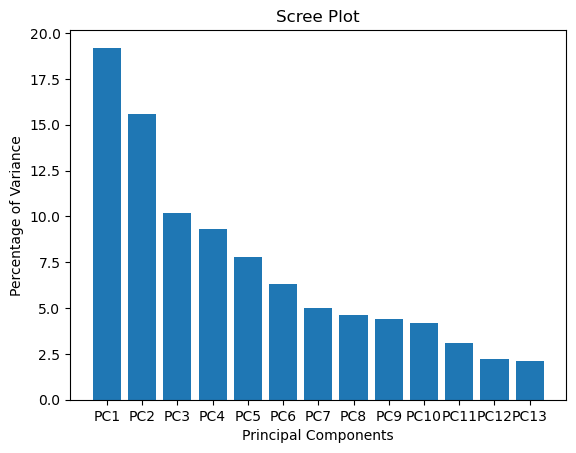

In [110]:
b_structure
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.savefig("StructurePCA.png") 
plt.show()

In [111]:
#Ahora sin las neutrales
ind = 0
my_data_forPCAARR = np.asarray(my_data_forPCA)
images_names = np.sort(os.listdir('../ck+warpedAgainT_V1'))
current_neutral_index = 0
my_data_for_PCA_SNeu = [] 
current_subject = 'start'
for i in range(0, len(images_names)):           
    if int(images_names[i].split('_')[5].split('.')[0]) == 1:
        if current_subject != images_names[i].split('_')[3]:
            current_subject = images_names[i].split('_')[3]
            my_data_for_PCA_SNeu.append(my_data_forPCAARR[i])
    else:
        my_data_for_PCA_SNeu.append(my_data_forPCAARR[i])
        
            
            
    #    current_neutral_index = i
    #    print('cambie neutral '+ str(current_neutral_index))
    
    #my_data_aligned_diff.append(my_data.iloc[i]- my_data.iloc[current_neutral_index])
    
        
my_data_for_PCA_SNeu = np.asarray(my_data_for_PCA_SNeu)
my_data_for_PCA_SNeu.shape

(331, 22)

In [112]:
my_df = pd.DataFrame(my_data_for_PCA_SNeu)
my_df.to_csv('my_data_for_PCA_structure_SNeu_AgainT_V1.csv',header = False, index= False)


In [113]:
my_data_forPCA = pd.read_csv('my_data_for_PCA_structure_SNeu_AgainT_V1.csv',header = None)
my_data_forPCA

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.435555,1.304535,7.575994,0.000000
1,178.322800,228.563070,223.199770,200.493930,117.806540,48.861560,41.303760,113.565385,56.161860,59.063270,...,114.590580,29.215750,23.671367,83.422690,55.054520,19885.578719,1.435555,1.304535,7.575994,-0.053749
2,186.351832,245.849407,240.387553,220.659269,125.510782,49.671027,32.696519,127.791971,47.294834,80.218588,...,107.501807,25.145329,17.294111,52.715011,71.592272,19834.155421,1.429312,1.166385,7.971896,0.056734
3,189.722463,249.013017,244.823872,223.735687,128.056980,50.491604,32.815432,124.547537,52.183083,71.828807,...,107.694540,25.195928,19.438491,54.397276,68.502287,18643.253452,1.424823,1.237680,8.351419,-0.109582
4,175.639245,251.032038,246.242730,211.642368,120.960641,54.446327,38.960819,111.578042,42.552053,63.390938,...,139.732166,26.333854,16.404336,88.682116,79.402360,18737.403366,1.498883,1.367875,6.741337,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,180.206566,271.881427,270.117588,241.693689,133.870376,50.396774,53.639290,122.555181,50.341062,71.344153,...,135.056529,33.759416,15.348532,50.445675,92.592819,16385.610870,1.517584,1.074666,5.122257,-0.045169
327,178.402104,259.772866,257.452146,237.374579,138.523165,45.414236,49.048534,107.490318,53.257755,56.413371,...,128.756353,26.990711,18.228736,55.265960,90.092470,17395.053407,1.493940,1.086731,8.567321,0.000000
328,178.402104,259.772866,257.452146,237.374579,138.523165,45.414236,49.048534,107.490318,53.257755,56.413371,...,128.756353,26.990711,18.228736,55.265960,90.092470,17395.053407,1.493940,1.086731,8.567321,0.030169
329,182.486346,261.649639,260.294766,239.636025,140.874745,46.231858,47.410207,107.707836,53.045236,55.699328,...,131.026736,30.198028,18.570090,53.309212,92.236269,16645.729633,1.489913,1.078599,8.280735,-0.142725


In [114]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(my_data_forPCA)
scaled_landDiff.shape

(331, 22)

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit_transform(scaled_landDiff)
b_shape = pca.fit_transform(scaled_landDiff)
b_shape.shape

(331, 13)

In [117]:
print(sum(pca.explained_variance_ratio_))

0.9422254691617


In [118]:
my_df = pd.DataFrame(b_shape)
my_df.to_csv('pca_training_structurepoints_AgainT_V1_SNeu.csv',header = False, index= False)

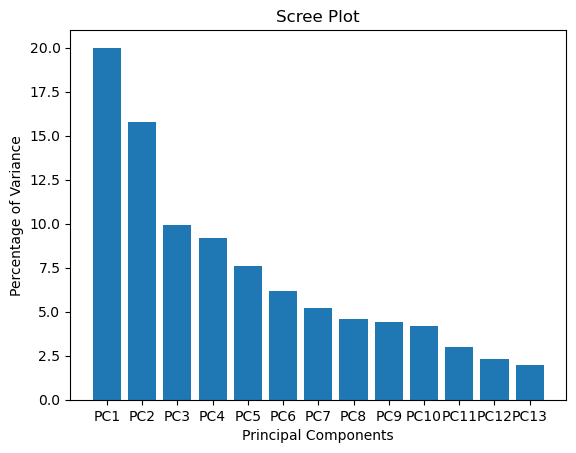

In [119]:
b_shape
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()